In [1]:
from tifffile import imread
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import sys
sys.path.append('..')
from plots import *
from utils import *

In [2]:
image_folder = DATA_PATH / "RESULTS/SPLITS/Analysis/dataset_splits"
visual = imread(image_folder / "visual.tif")

In [3]:
def find_images(path, split):
    return list(path.glob(f"*{split}*.tif"))

In [4]:
wnet_splits_preds = {
    "1090" : find_images(image_folder / "WNet/10", "pred"),
    "2080" : find_images(image_folder / "WNet/20", "pred"),
    "6040" : find_images(image_folder / "WNet/60", "pred"),
    "8020" : find_images(image_folder / "WNet/80", "pred"),
} # these are lists where each element is an image for a split (3 per split)

In [5]:
def wnet_preprocessing(volume, channel_foreground, thresh):
    # this should only be done on volumes with more than 3 dimensions
    if len(volume.shape) < 4:
        return volume
    volume = volume[channel_foreground]
    volume = np.where(volume > thresh, 1, 0)
    return volume

In [6]:
preds_df = pd.DataFrame(columns=["split", "image", "path"])
for split, volumes in wnet_splits_preds.items():
    for i, volume in enumerate(volumes):
        preds_df.loc[preds_df.shape[0]] = [split, i, volume]

In [7]:
preds_df["channel_foreground"] = [0 if "c0" in preds_df.loc[i, "path"].name else 1 for i in range(preds_df.shape[0])]

In [8]:
preds_df

,split,image,path,channel_foreground
0,1090,0,C:\Users\Cyril\Desktop\Code\CELLSEG_BENCHMARK\...,0
1,1090,1,C:\Users\Cyril\Desktop\Code\CELLSEG_BENCHMARK\...,0
2,1090,2,C:\Users\Cyril\Desktop\Code\CELLSEG_BENCHMARK\...,1
3,2080,0,C:\Users\Cyril\Desktop\Code\CELLSEG_BENCHMARK\...,0
4,2080,1,C:\Users\Cyril\Desktop\Code\CELLSEG_BENCHMARK\...,0
5,2080,2,C:\Users\Cyril\Desktop\Code\CELLSEG_BENCHMARK\...,1
6,6040,0,C:\Users\Cyril\Desktop\Code\CELLSEG_BENCHMARK\...,0
7,6040,1,C:\Users\Cyril\Desktop\Code\CELLSEG_BENCHMARK\...,0
8,6040,2,C:\Users\Cyril\Desktop\Code\CELLSEG_BENCHMARK\...,1
9,8020,0,C:\Users\Cyril\Desktop\Code\CELLSEG_BENCHMARK\...,0


In [25]:
thresholds = np.arange(0.1, 1, 0.05)
thresholds = np.round(thresholds, 2)
visual = np.where(visual > 0, 1, 0)
dices_df = pd.DataFrame(columns=["split", "image", "threshold", "dice"])

# for each split, plot the Dice vs threshold
for split in wnet_splits_preds.keys():
    # get volumes for this split from dataframe
    preds_subset = preds_df[preds_df["split"] == split]
    for i, volume_path in enumerate(preds_subset["path"]):
        volume = imread(volume_path)
        for thresh in thresholds:
            channel_foreground = preds_subset.iloc[i]["channel_foreground"]
            print(f"Split: {split}, Image: {Path(volume_path).name}, Threshold: {thresh}, Channel: {channel_foreground}")
            volume_thresh = wnet_preprocessing(volume, channel_foreground, thresh)
            visual = visual[:50, ...]
            volume_thresh = volume_thresh[:50, ...]
            dice = dice_coeff(visual, volume_thresh)
            dices_df.loc[len(dices_df)] = [split, volume_path, thresh, dice]
dices_df.reset_index(drop=True, inplace=True)

Split: 1090, Image: c0_small_isotropic_visual_WNet_pred_1_2024_04_30_12_44_44.tif, Threshold: 0.1, Channel: 0
Split: 1090, Image: c0_small_isotropic_visual_WNet_pred_1_2024_04_30_12_44_44.tif, Threshold: 0.15, Channel: 0
Split: 1090, Image: c0_small_isotropic_visual_WNet_pred_1_2024_04_30_12_44_44.tif, Threshold: 0.2, Channel: 0
Split: 1090, Image: c0_small_isotropic_visual_WNet_pred_1_2024_04_30_12_44_44.tif, Threshold: 0.25, Channel: 0
Split: 1090, Image: c0_small_isotropic_visual_WNet_pred_1_2024_04_30_12_44_44.tif, Threshold: 0.3, Channel: 0
Split: 1090, Image: c0_small_isotropic_visual_WNet_pred_1_2024_04_30_12_44_44.tif, Threshold: 0.35, Channel: 0
Split: 1090, Image: c0_small_isotropic_visual_WNet_pred_1_2024_04_30_12_44_44.tif, Threshold: 0.4, Channel: 0
Split: 1090, Image: c0_small_isotropic_visual_WNet_pred_1_2024_04_30_12_44_44.tif, Threshold: 0.45, Channel: 0
Split: 1090, Image: c0_small_isotropic_visual_WNet_pred_1_2024_04_30_12_44_44.tif, Threshold: 0.5, Channel: 0
Split:

In [26]:
dices_df

,split,image,threshold,dice
0,1090,C:\Users\Cyril\Desktop\Code\CELLSEG_BENCHMARK\...,0.10,0.040419
1,1090,C:\Users\Cyril\Desktop\Code\CELLSEG_BENCHMARK\...,0.15,0.040419
2,1090,C:\Users\Cyril\Desktop\Code\CELLSEG_BENCHMARK\...,0.20,0.040419
3,1090,C:\Users\Cyril\Desktop\Code\CELLSEG_BENCHMARK\...,0.25,0.040419
4,1090,C:\Users\Cyril\Desktop\Code\CELLSEG_BENCHMARK\...,0.30,0.040421
...,...,...,...,...
211,8020,C:\Users\Cyril\Desktop\Code\CELLSEG_BENCHMARK\...,0.75,0.109028
212,8020,C:\Users\Cyril\Desktop\Code\CELLSEG_BENCHMARK\...,0.80,0.043926
213,8020,C:\Users\Cyril\Desktop\Code\CELLSEG_BENCHMARK\...,0.85,0.017153
214,8020,C:\Users\Cyril\Desktop\Code\CELLSEG_BENCHMARK\...,0.90,0.005869


<Axes: xlabel='threshold', ylabel='dice'>

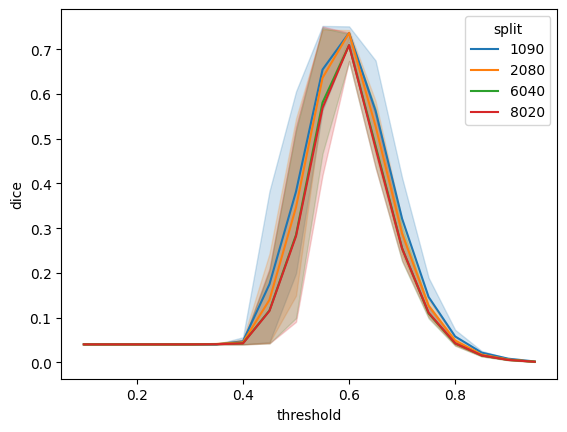

In [27]:
sns.lineplot(data=dices_df, x="threshold", y="dice", hue="split")

In [28]:
dices_df[dices_df.threshold == 0.6]

,split,image,threshold,dice
10,1090,C:\Users\Cyril\Desktop\Code\CELLSEG_BENCHMARK\...,0.6,0.751064
28,1090,C:\Users\Cyril\Desktop\Code\CELLSEG_BENCHMARK\...,0.6,0.742234
46,1090,C:\Users\Cyril\Desktop\Code\CELLSEG_BENCHMARK\...,0.6,0.715885
64,2080,C:\Users\Cyril\Desktop\Code\CELLSEG_BENCHMARK\...,0.6,0.742706
82,2080,C:\Users\Cyril\Desktop\Code\CELLSEG_BENCHMARK\...,0.6,0.741612
100,2080,C:\Users\Cyril\Desktop\Code\CELLSEG_BENCHMARK\...,0.6,0.724887
118,6040,C:\Users\Cyril\Desktop\Code\CELLSEG_BENCHMARK\...,0.6,0.734190
136,6040,C:\Users\Cyril\Desktop\Code\CELLSEG_BENCHMARK\...,0.6,0.719976
154,6040,C:\Users\Cyril\Desktop\Code\CELLSEG_BENCHMARK\...,0.6,0.673014
172,8020,C:\Users\Cyril\Desktop\Code\CELLSEG_BENCHMARK\...,0.6,0.736709
